#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#check for duplicates
df.duplicated().sum()

1081

In [6]:
#remove duplicates
df = df.drop_duplicates()

In [7]:
#confirm if duplicates has been removed
df.duplicated().sum()

0

In [8]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

#### Class Distribution (Imbalance Check)

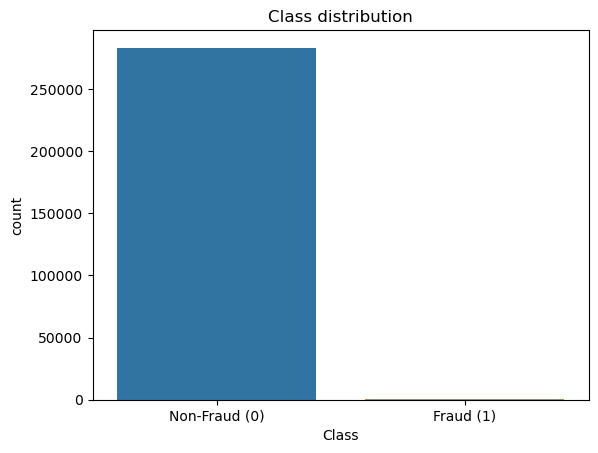

In [9]:
sns.countplot(x = "Class", data = df)
plt.title ("Class distribution")
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.show()

In [10]:
fraud_percentage = df["Class"].value_counts(normalize = True)[1] * 100
print(f"Fraud Transaction: {fraud_percentage:.2f}%")

Fraud Transaction: 0.17%


#### Time Feature Visualization

Text(0, 0.5, 'Frequency')

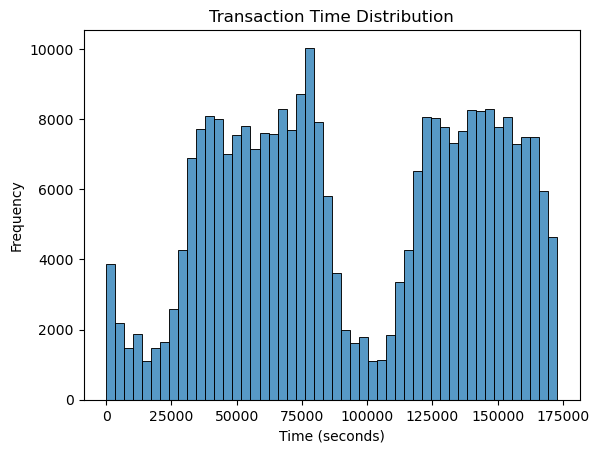

In [11]:
# Distribution of transactions over time
sns.histplot(df["Time"], bins = 50)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")

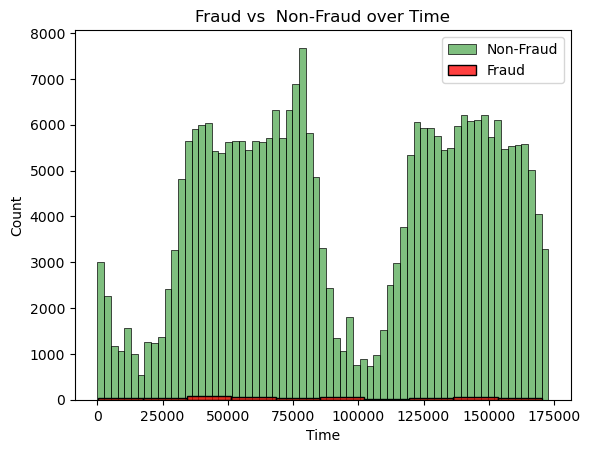

In [12]:
# Distribution of Fraud over Time
sns.histplot(df[df["Class"] == 0]["Time"], color = "green", alpha = 0.5, label= "Non-Fraud")
sns.histplot(df[df["Class"] == 1]["Time"], color = "red", label= "Fraud")
plt.title("Fraud vs  Non-Fraud over Time")
plt.legend()

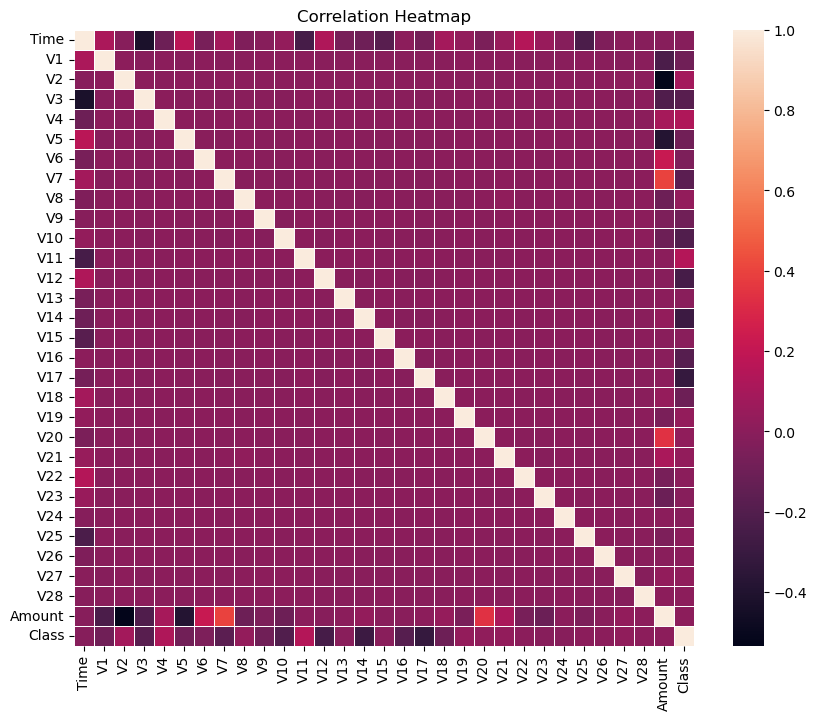

In [15]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
correlation_with_class = corr['Class'].sort_values(ascending=False)
correlation_with_class

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64